<a href="https://colab.research.google.com/github/nishitgala89/ProjectDissertation/blob/main/Code/2_DataPreparation_RemovingDuplicates/MorningStar_Train_Test_RemovingDuplicates_UsingUtilFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Set whether Return based on 60months (GBRReturnM60) column needs to be dropped**


In [1]:
dropM60 = False

**Importing Utilities File**

In [2]:
# from google.colab import files
# src = list(files.upload().values())[0]
# open('morningStarUtilities.py','wb').write(src)
# import morningStarUtilities

### Import from Github

In [3]:
user = 'nishitgala89'
repo = 'ProjectDissertation'
src_dir = "Code/utilities"
pyfile = "morningStarUtilities.py"

url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src_dir}/{pyfile}"
!wget --no-cache --backups=1 {url}

import morningStarUtilities

--2021-11-29 13:41:10--  https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Code/utilities/morningStarUtilities.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6484 (6.3K) [text/plain]
Failed to rename morningStarUtilities.py to morningStarUtilities.py.1: (2) No such file or directory
Saving to: ‘morningStarUtilities.py’

morningStarUtilitie 100%[===================>]   6.33K  --.-KB/s    in 0s      

2021-11-29 13:41:10 (68.9 MB/s) - ‘morningStarUtilities.py’ saved [6484/6484]



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
morningstar_data_url = "https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Morningstar_new_df.csv"
morningstar_df = pd.read_csv(morningstar_data_url)
morningstar_df.rename(columns = {morningstar_df.columns[0]: "SecId"}, inplace=True)
morningstar_df.set_index("SecId",inplace=True)

In [6]:
morningstar_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 1184 entries, F0GBR04N5Q to F0GBR04OC1
Columns: 49 entries, Name to TrackRecordExtension
dtypes: bool(1), float64(29), int64(13), object(6)
memory usage: 454.4+ KB


In [7]:
morningstar_df[morningstar_df['GBRReturnM3'].isnull()].index

Index(['F00000XCYF', 'F00000W1FR'], dtype='object', name='SecId')

In [8]:
morningstar_df.shape

(1184, 49)

In [9]:
morningstar_df = morningStarUtilities.dropRecordsbyRowIndex('GBRReturnM3',morningstar_df)

Removing Index -->  ['F00000XCYF', 'F00000W1FR']


In [10]:
morningstar_df.shape

(1182, 49)

In [11]:
morningstar_df = morningStarUtilities.generalizeMorningStarCategories(morningstar_df)
morningstar_df.info()

Large-Cap        451
Miscellaneous    242
Flex-Cap         179
Mid_Small-Cap    161
Income           149
Name: CategoryName, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1182 entries, F0GBR04N5Q to F0GBR04OC1
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              1182 non-null   object 
 1   PriceCurrency                     1182 non-null   object 
 2   TenforeId                         1180 non-null   object 
 3   LegalName                         1182 non-null   object 
 4   ClosePrice                        1182 non-null   float64
 5   StarRatingM255                    1182 non-null   int64  
 6   SustainabilityRank                1182 non-null   int64  
 7   QuantitativeRating                487 non-null    float64
 8   Yield_M12                         1180 non-null   float64
 9   GBRReturnD1                       1182 non-null

In [12]:
# Dropping columns as per analysis in the sheet {MorningStar_RemovedDuplicates_EDA}

morningstar_df = morningStarUtilities.dropColumns(morningstar_df,
                                                  'ClosePrice','GBRReturnD1','LegalName',
                                                  'TenforeId','PriceCurrency',
                                                  'QuantitativeRating','MaxDeferredLoad',
                                                  'InvestorTypeRetail',
                                                  'InvestorTypeEligibleCounterparty',
                                                  'InvestorTypeProfessional',
                                                  'ReturnProfileOther', 'ReturnProfileGrowth',
                                                  'MaximumExitCostAcquired','FeeLevel',
                                                  'ExpertiseBasic','ExpertiseAdvanced',
                                                  'ExpertiseInformed','GBRReturnM120',
                                                  'PerformanceFeeActual')


In [13]:
morningstar_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1182 entries, F0GBR04N5Q to F0GBR04OC1
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       1182 non-null   object 
 1   StarRatingM255             1182 non-null   int64  
 2   SustainabilityRank         1182 non-null   int64  
 3   Yield_M12                  1180 non-null   float64
 4   GBRReturnW1                1182 non-null   float64
 5   GBRReturnM1                1182 non-null   float64
 6   GBRReturnM3                1182 non-null   float64
 7   GBRReturnM6                1182 non-null   float64
 8   GBRReturnM0                1182 non-null   float64
 9   GBRReturnM12               1182 non-null   float64
 10  GBRReturnM36               1182 non-null   float64
 11  GBRReturnM60               1026 non-null   float64
 12  MaxFrontEndLoad            1157 non-null   float64
 13  OngoingCostActual          1171 non-nu

In [14]:
morningStarUtilities.checkNullValues(morningstar_df)

GBRReturnM60            156
MaxFrontEndLoad          25
OngoingCostActual        11
FundTNAV                  8
TransactionFeeActual      8
ReturnProfileHedging      2
Yield_M12                 2
dtype: int64

**Checking M60 condition**

In [15]:
if dropM60:
  morningstar_df = morningStarUtilities.dropColumns(morningstar_df,"GBRReturnM60")
else:
  morningstar_df = morningStarUtilities.dropRecordsbyRowIndex('GBRReturnM60',morningstar_df)

Removing Index -->  ['F00000ZJLW', 'F00000ZSTR', 'F00001457X', 'F00000ZGCY', 'F00000Y4KZ', 'F00000Y4L0', 'F00000YR7U', 'F000010DLP', 'F00000YOJO', 'F00000ZW92', 'F00000ZRHA', 'F00000Z9NI', 'F000010F5D', 'F00000XH8D', 'F00000YENN', 'F00000YXCI', 'F00001154P', 'F00000ZMH7', 'F00000ZHS4', 'F000011DVW', 'F00000YFOR', 'F00000VUCI', 'F00000YDBN', 'F00000XGMV', 'F000010BFA', 'F00000Z2S2', 'F00000YWGS', 'F00000YA2Z', 'F00000ZCZD', 'F00000ZLI0', 'F00000TW81', 'F000011007', 'F0000100W5', 'F0000100W9', 'F00000ZHOD', 'F00000ZOT1', 'F0000110I4', 'F00000XK81', 'F00000ZS1K', 'F00000ZF2V', 'F00000ZBNA', 'F00000YF5K', 'F00000YCY2', 'F00000YCGU', 'F00000WMBE', 'F00000YIFV', 'F00000ZXQG', 'F00000RW8J', 'F00000RW8K', 'F00000ZIAD', 'F0000155AX', 'F00000YWBD', 'F00000ZQYQ', 'F00000ZZAS', 'F00000ZZS6', 'F00000YXCO', 'F00000YM39', 'F00000YBT6', 'F00000XVJA', 'F000010BB8', 'F00000XKW9', 'F0000109PF', 'F0000102PG', 'F0000102Y6', 'F00000QB3R', 'F00000ZW98', 'F00000ZYGQ', 'F00000YXWS', 'F00000Z0AM', 'F0000108LM',

In [16]:
morningstar_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1026 entries, F0GBR04N5Q to F0GBR04OC1
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       1026 non-null   object 
 1   StarRatingM255             1026 non-null   int64  
 2   SustainabilityRank         1026 non-null   int64  
 3   Yield_M12                  1025 non-null   float64
 4   GBRReturnW1                1026 non-null   float64
 5   GBRReturnM1                1026 non-null   float64
 6   GBRReturnM3                1026 non-null   float64
 7   GBRReturnM6                1026 non-null   float64
 8   GBRReturnM0                1026 non-null   float64
 9   GBRReturnM12               1026 non-null   float64
 10  GBRReturnM36               1026 non-null   float64
 11  GBRReturnM60               1026 non-null   float64
 12  MaxFrontEndLoad            1017 non-null   float64
 13  OngoingCostActual          1019 non-nu

In [17]:
test_index = round(morningstar_df.shape[0] * 0.25)

In [18]:
shuffled_df = morningstar_df.sample(frac=1)
test_df, train_df = shuffled_df[:test_index], shuffled_df[test_index:]

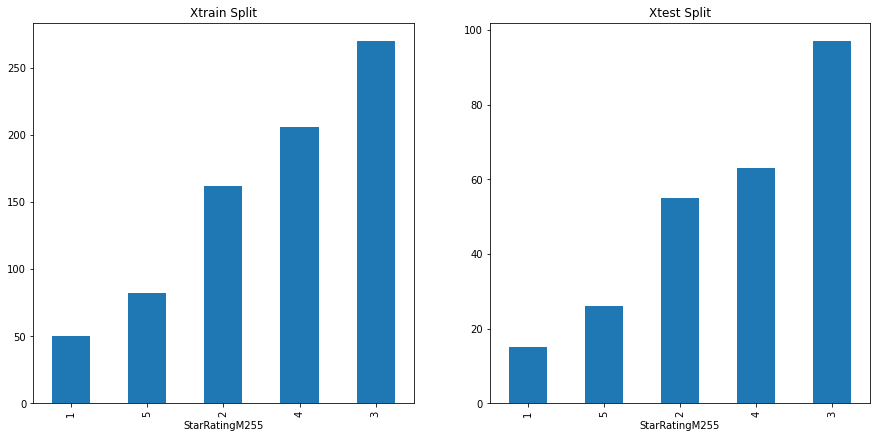

In [19]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
train_df.groupby(['StarRatingM255'])['StarRatingM255'].count().sort_values().plot(kind='bar',ax=ax[0], title='Xtrain Split')
test_df.groupby(['StarRatingM255'])['StarRatingM255'].count().sort_values().plot(kind='bar',ax=ax[1], title='Xtest Split')
plt.show()

**Check M60 Flag at Top**

In [20]:
if dropM60:
  train_df.to_csv("morningstar_removedDuplicates_train_withoutM60.csv",index="SecId")
  test_df.to_csv("morningstar_removedDuplicates_test_withoutM60.csv",index="SecId")
else:
  train_df.to_csv("morningstar_removedDuplicates_train_withM60.csv",index="SecId")
  test_df.to_csv("morningstar_removedDuplicates_test_withM60.csv",index="SecId")